In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 100
training_episode_count = 3
eval_episode_count = 5
maximum_node_count = 12
maximum_total_credentials = 10
plots_dir = "notebooks/output/toyctf_tabularq/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

In [8]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=3,iteration_count=100,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/3 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 19|reward:   11.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 40|reward:   11.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:   11.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:   22.0|last_reward_at:   19|Elapsed Time: 0:00:00||

Episode 1|Iteration 60|reward:   22.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:   33.0|last_reward_at:   60|Elapsed Time: 0:00:00||

Episode 1|Iteration 62|reward:   33.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:   44.0|last_reward_at:   62|Elapsed Time: 0:00:00||

Episode 1|Iteration 63|reward:   44.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:   58.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:   58.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  108.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 1|Iteration 80|reward:  108.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 93|reward:  108.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  108.0|last_reward_at:   80|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 4/63 (0.06)
    explore-connect: 0/9 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 2/3 'Tabular Q-learning' ϵ=0.8826, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 2|Iteration 22|reward:   33.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:   44.0|last_reward_at:   22|Elapsed Time: 0:00:00||

Episode 2|Iteration 30|reward:   44.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   58.0|last_reward_at:   30|Elapsed Time: 0:00:00||

Episode 2|Iteration 31|reward:   58.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  108.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 2|Iteration 49|reward:  108.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 63|reward:  108.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  114.0|last_reward_at:   49|Elapsed Time: 0:00:00||

Episode 2|Iteration 74|reward:  114.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 75|reward:  128.0|last_reward_at:   74|Elapsed Time: 0:00:00||

Episode 2|Iteration 75|reward:  128.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  178.0|last_reward_at:   75|Elapsed Time: 0:00:00||

Episode 2|Iteration 80|reward:  178.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  189.0|last_reward_at:   80|Elapsed Time: 0:00:00||

Episode 2|Iteration 81|reward:  189.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 97|reward:  189.0|last_reward_at:   81|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  189.0|last_reward_at:   81|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/10 (0.00)
    explore-remote: 6/44 (0.12)
    explore-connect: 0/34 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 1/2 (0.33)
    exploit-connect: 2/0 (1.00)
  exploit deflected to exploration: 8
  ## Episode: 3/3 'Tabular Q-learning' ϵ=0.8653, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 3|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 3|Iteration 24|reward:   33.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:   47.0|last_reward_at:   24|Elapsed Time: 0:00:00||

Episode 3|Iteration 42|reward:   47.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:   97.0|last_reward_at:   42|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:   97.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 59|reward:   97.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  108.0|last_reward_at:   44|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  108.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 83|reward:  108.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  117.0|last_reward_at:   63|Elapsed Time: 0:00:00||

Episode 3|Iteration 89|reward:  117.0|last_reward_at:   89|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  117.0|last_reward_at:   89|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 4/52 (0.07)
    explore-connect: 0/21 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 1/8 (0.11)
    exploit-connect: 1/2 (0.33)
  exploit deflected to exploration: 3
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=5,iteration_count=100,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 1|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 1|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   44.0|last_reward_at:    4|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   58.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:   58.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  108.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 17|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  117.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 1|Iteration 23|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 32|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 42|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 51|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 59|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 68|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 75|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 83|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 92|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 99|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

Episode 1|Iteration 100|reward:  117.0|last_reward_at:   23|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/1 (0.50)
    explore-remote: 1/5 (0.17)
    explore-connect: 0/2 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/8 (0.33)
    exploit-connect: 1/77 (0.01)
  exploit deflected to exploration: 10
  ## Episode: 2/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 2|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 2|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 2|Iteration 11|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 21|reward:   44.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   58.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 2|Iteration 25|reward:   58.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  108.0|last_reward_at:   25|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 35|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 44|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 51|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 59|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 65|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 73|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 79|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 87|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 95|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 100|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/8 (0.00)
    explore-remote: 0/48 (0.00)
    explore-connect: 0/28 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/10 (0.29)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 84
  ## Episode: 3/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 3|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||

Episode 3|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 3|Iteration 17|reward:   47.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   97.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 3|Iteration 18|reward:   97.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 27|reward:   97.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 3|Iteration 31|reward:  108.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 37|reward:  108.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 44|reward:  108.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 51|reward:  108.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  122.0|last_reward_at:   31|Elapsed Time: 0:00:00||

Episode 3|Iteration 57|reward:  122.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  172.0|last_reward_at:   57|Elapsed Time: 0:00:00||

Episode 3|Iteration 58|reward:  172.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  181.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 3|Iteration 67|reward:  181.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 76|reward:  181.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 85|reward:  181.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 93|reward:  181.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 3|Iteration 100|reward:  181.0|last_reward_at:   67|Elapsed Time: 0:00:00||

  Episode 3 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/3 (0.00)
    explore-remote: 1/12 (0.08)
    explore-connect: 0/15 (0.00)
    exploit-local: 1/1 (0.50)
    exploit-remote: 5/27 (0.16)
    exploit-connect: 2/33 (0.06)
  exploit deflected to exploration: 31
  ## Episode: 4/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||

Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||

Episode 4|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 4|Iteration 8|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 14|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   58.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 4|Iteration 17|reward:   58.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  108.0|last_reward_at:   17|Elapsed Time: 0:00:00||

Episode 4|Iteration 18|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 25|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 30|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 35|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 40|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 44|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 49|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 54|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 59|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 63|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 68|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 73|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 78|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:00||

Episode 4|Iteration 82|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 4|Iteration 87|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 4|Iteration 92|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 4|Iteration 98|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:01||

Episode 4|Iteration 100|reward:  108.0|last_reward_at:   18|Elapsed Time: 0:00:01||

  Episode 4 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/9 (0.10)
    explore-remote: 0/41 (0.00)
    explore-connect: 0/37 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/7 (0.36)
    exploit-connect: 1/0 (1.00)
  exploit deflected to exploration: 88
  ## Episode: 5/5 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 5|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"


Episode 5|Iteration 10|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:01||

Episode 5|Iteration 10|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."


Episode 5|Iteration 11|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 5|Iteration 13|reward:   22.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 5|Iteration 15|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:02||

Episode 5|Iteration 15|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:02||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]


Episode 5|Iteration 16|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 5|Iteration 19|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 5|Iteration 22|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:02||

Episode 5|Iteration 24|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:03||

Episode 5|Iteration 24|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 5|Iteration 25|reward:   44.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 5|Iteration 26|reward:   58.0|last_reward_at:   24|Elapsed Time: 0:00:03||

Episode 5|Iteration 26|reward:   58.0|last_reward_at:   26|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]
AzureResourceManager,discovered,NaN,None,[ListAzureResources]


Episode 5|Iteration 27|reward:   58.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 5|Iteration 27|reward:  108.0|last_reward_at:   26|Elapsed Time: 0:00:03||

Episode 5|Iteration 27|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:03||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 5|Iteration 28|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 31|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 35|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 40|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 44|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 49|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 54|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 59|reward:  108.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 60|reward:  117.0|last_reward_at:   27|Elapsed Time: 0:00:04||

Episode 5|Iteration 60|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:04||

,status,properties,local_attacks,remote_attacks
id,,,,
client,owned,[],[SearchEdgeHistory],[]
AzureResourceManager,owned,[CTFFLAG:LeakedCustomerData2],[],[ListAzureResources]
Website,discovered,NaN,None,"[ScanPageContent, ScanPageSource]"
Website.Directory,discovered,NaN,None,"[NavigateWebDirectoryFurther, NavigateWebDirec..."
GitHubProject,discovered,NaN,None,[CredScanGitHistory]
Sharepoint,discovered,NaN,None,[ScanSharepointParentDirectory]


Episode 5|Iteration 61|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 5|Iteration 64|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:04||

Episode 5|Iteration 68|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 71|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 76|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 79|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 83|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 87|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 92|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 97|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

Episode 5|Iteration 100|reward:  117.0|last_reward_at:   60|Elapsed Time: 0:00:05||

  Episode 5 stopped at t=100 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 1/22 (0.04)
    explore-connect: 0/18 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/12 (0.25)
    exploit-connect: 1/40 (0.02)
  exploit deflected to exploration: 42
simulation ended


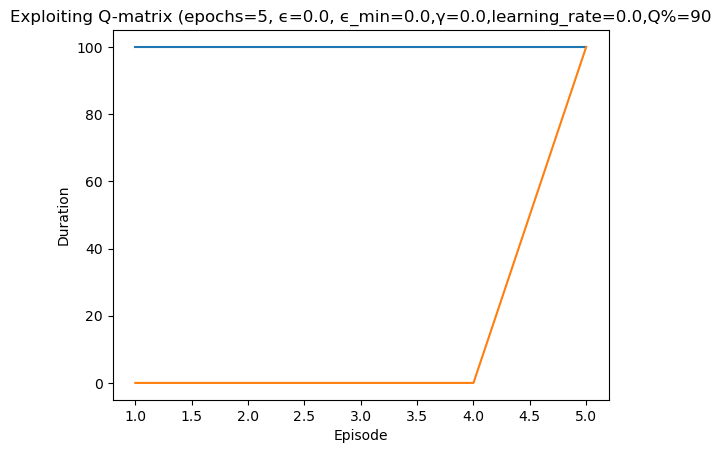

In [9]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"tabularq-{gymid}"),
    title="Exploiting Q-matrix",
)

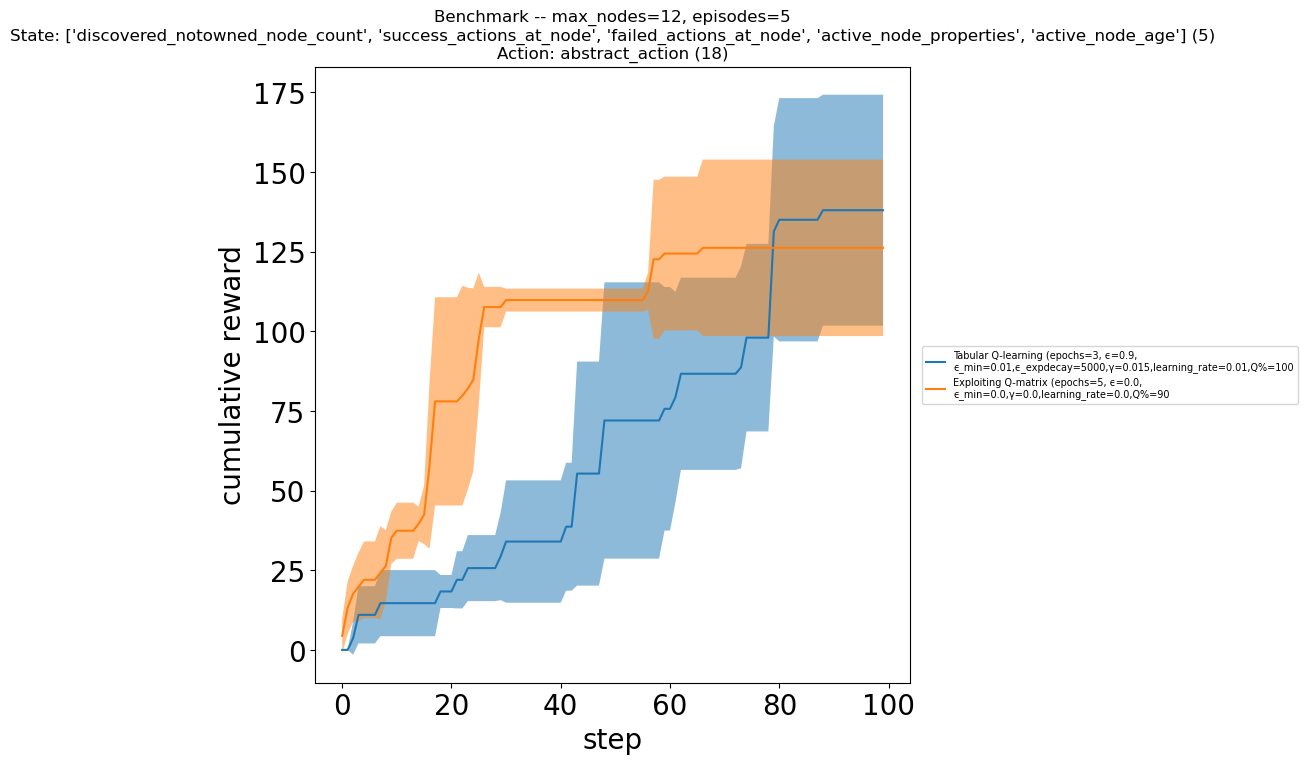

In [10]:
# Compare and plot results for all the agents
all_runs = [
    tabularq_run,
    tabularq_exploit_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

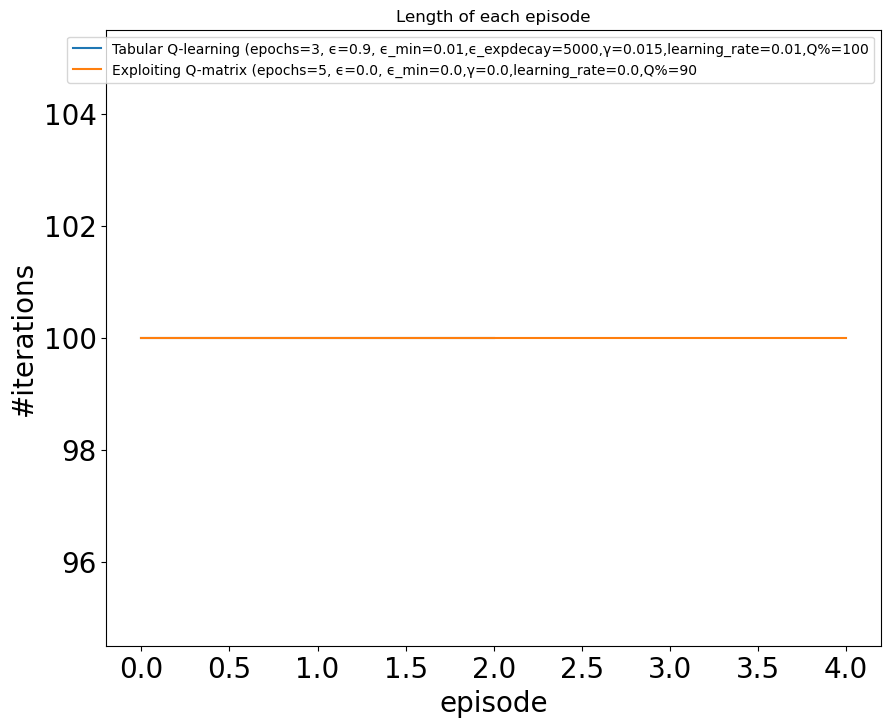

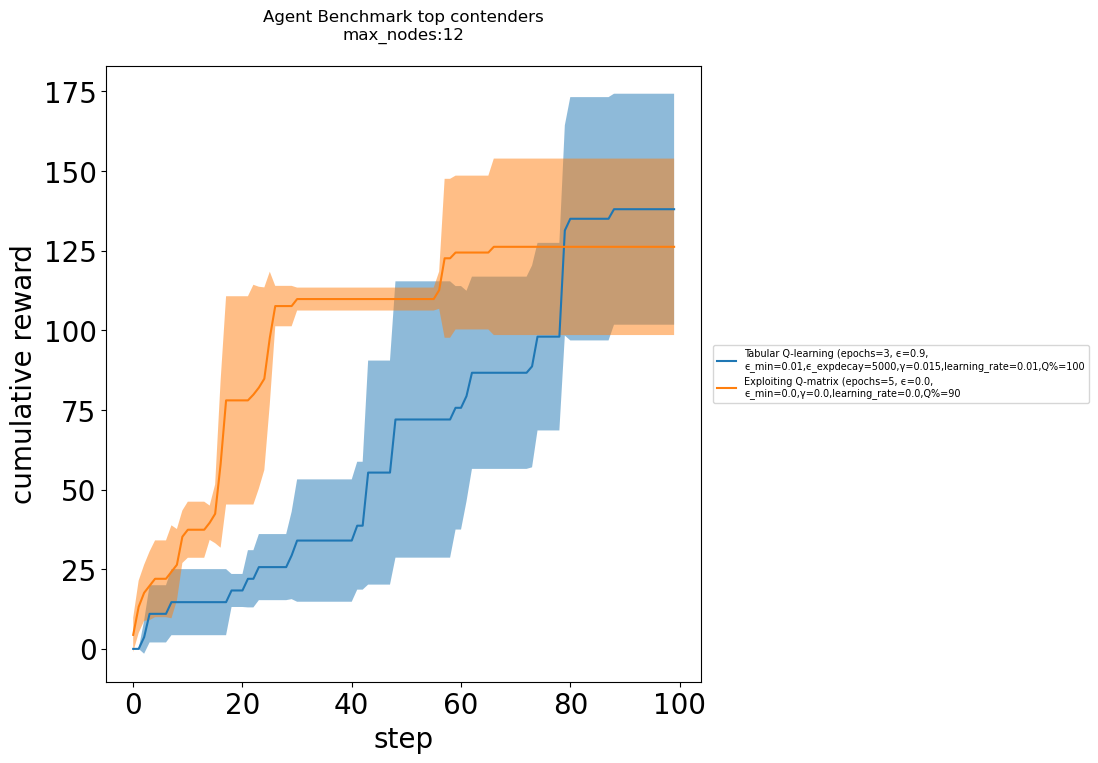

In [11]:
contenders = [tabularq_run, tabularq_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

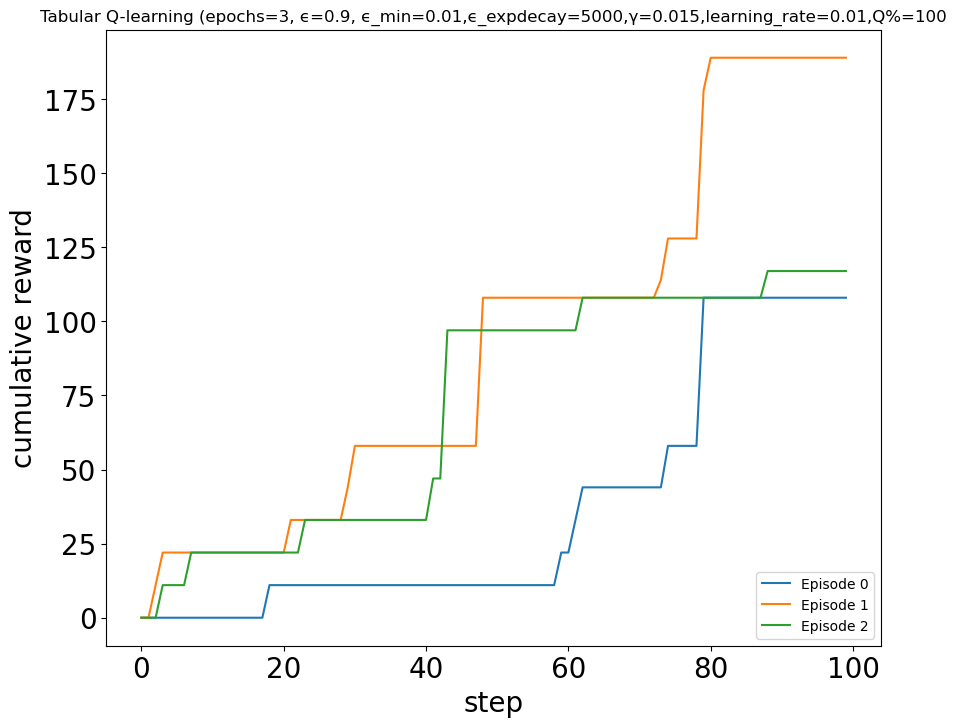

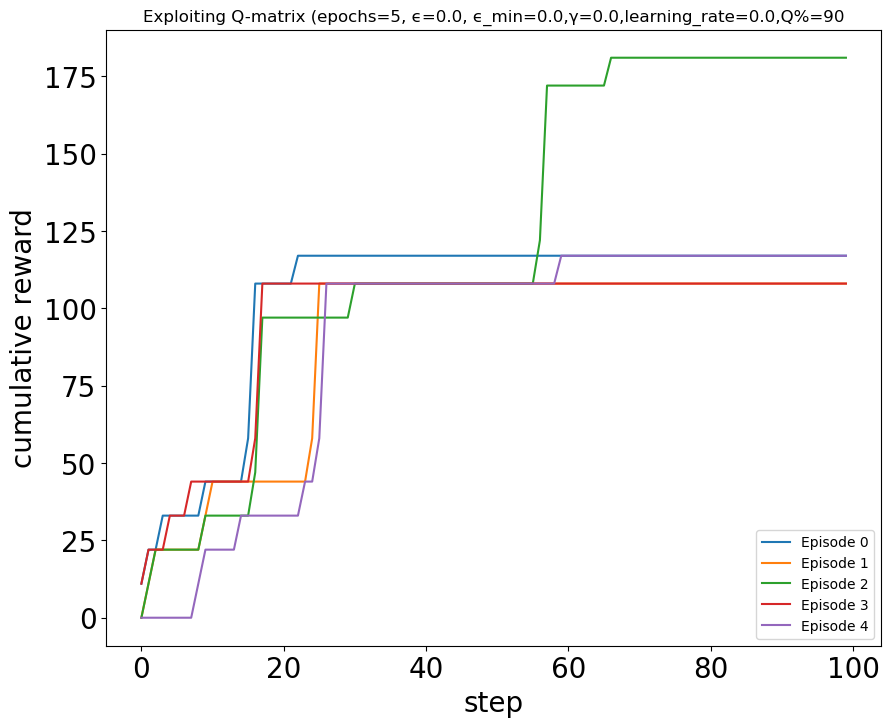

In [12]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)